# Reading the Dataset

In [1]:
#libraries imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset
Tt = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")

# Summarizing the dataset

In [3]:
#see the data
Tt.head()

#Sibsp = Siblings/spouse, Parchi = parents/children

,Survived,Pclass,Name,Sex,Age,Sibsp,Parchi,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
#how many people
Tt.count()

Survived    887
Pclass      887
Name        887
Sex         887
Age         887
Sibsp       887
Parchi      887
Fare        887
dtype: int64

In [5]:
#Female count
Tt[Tt['Sex'].str.match("female")].count()

Survived    314
Pclass      314
Name        314
Sex         314
Age         314
Sibsp       314
Parchi      314
Fare        314
dtype: int64

In [6]:
#male count
Tt[Tt['Sex'].str.match("male")].count()

Survived    573
Pclass      573
Name        573
Sex         573
Age         573
Sibsp       573
Parchi      573
Fare        573
dtype: int64

# Visualzing the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

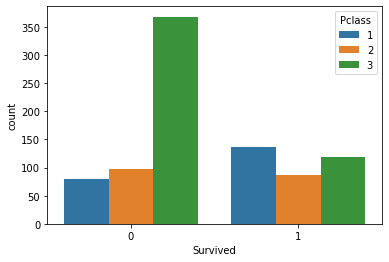

In [7]:
#how many people survived by class
sns.countplot(x='Survived', hue='Pclass', data=Tt)

<AxesSubplot:xlabel='Survived', ylabel='count'>

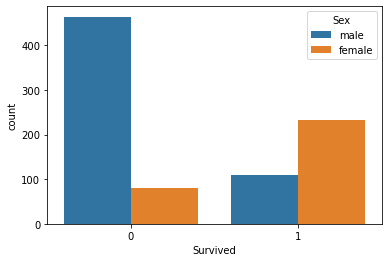

In [8]:
#how many people survived by gender
sns.countplot(x='Survived', hue='Sex', data=Tt)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

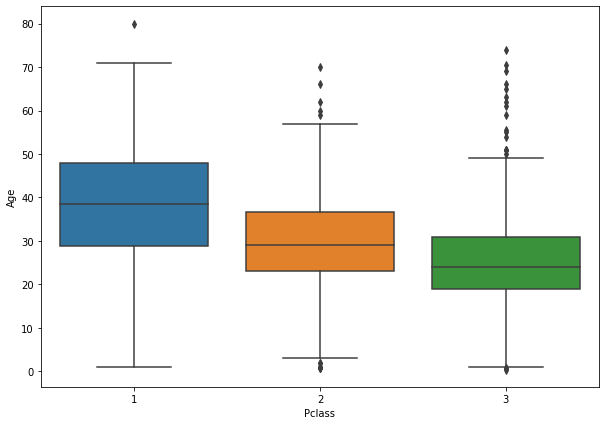

In [9]:
#Age average per class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=Tt)

# Cleaning the dataset

In [10]:
#creating two columns for male and female
pd.get_dummies(Tt["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [11]:
#remove one cloumn
sex = pd.get_dummies(Tt["Sex"],drop_first=True)
Pclass = pd.get_dummies(Tt["Pclass"],drop_first=True)

In [12]:
#adding these variables to the dataset
train = pd.concat([Tt,sex,Pclass],axis=1)

In [13]:
#remove some columns that we are not going to use for our model.
train.drop(["Pclass","Name","Sex","Fare"],axis=1,inplace=True)

# Modelling the data

In [14]:
#X will contain all the features and y will contain the target variable
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [15]:
#We will use train_test_split from cross_validation module to split our data. 70% of the data will be training data and %30 will be testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [16]:
#Logistic Regression to train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [17]:
#how accurate is our model for predictions
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


#We got 78% accuraccy

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       108

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

#True positive: 138 (We predicted a positive result and it was positive)
#True negative: 71 (We predicted a negative result and it was negative)
#False positive: 21 (We predicted a positive result and it was negative)
#False negative: 37 (We predicted a negative result and it was positive)

array([[138,  21],
       [ 37,  71]], dtype=int64)

In [19]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score (y_test, predictions)

0.7827715355805244